# Tarea Final Matemáticas y Computación F1004B

### Andrew Dunkerley, Emiliano Cabrera, Do Hyun Nam

En esta tarea, el reto es implementar un programa que pueda encontrar los puntos críticos de una función polinomial de segundo, tercer o cuarto grado y diga si son máximos o mínimos. Una vez que se hayan calculado los puntos, el programa debe crear el gráfico de la función y mostrar los puntos críticos.


### Sección 1: Objetivos

En tu programa se debe poder definir el grado de la función, los coeficientes y el intervalo en x donde encontrar los puntos críticos.

Con el grado nos referimos al exponente de $x$ más alto y con coeficientes nos referimos a los números constantes que multiplican a cada $x$ en la ecuación polinomial. 

Por ejemplo, la siguiente es una función polinomial de tercer grado con coeficientes $c_3, c_2, c_1$ y $c_0$.

$f(x) = c_3 x^3 + c_2 x^2 + c_1 x + c_0$

### Sección 2: El Algoritmo

El algoritmo a implementar es el siguiente,

1. Para cada punto $f(n)$, aproximamos la pendiente con $f(n) - f(n-1)$ (el punto anterior).
1. Guardamos la pendiente actual, si no es el primer paso, la comparamos con la anterior.
1. Si el signo de la pendiente anterior es diferente al actual, encontramos un punto crítico.
1. Dado el cambio de símbolo (positivo a negativo ó negativo a positivo) determinar si se trata de un máximo  un mínimo.
1. Repetir hasta haber analizado todos los puntos de $x$

### Sección 3: Representando funciones en Python

Ahora veamos como representar una función en python. A diferencia de lo que estamos acostumbrados, no podemos tomar el intervalo de $(-\infty,\infty)$ en $x$, necesitamos restringirlo porque si no, no sabremos donde parar. Haremos este ejercicio para la función,

$f(x) = x^3 - 2x^2 - 5x + 6$

Y el intervalo en $x$ de $[-3,4]$

Como siempre, lo primero que haremos es importar las librerías necesarias.

In [73]:
import numpy as np
import matplotlib.pyplot as plt

Ahora creamos arreglos para $x$ y $f(x)$.

In [74]:
x = np.linspace(-3,4,100)
f_x = (x**3-2*x**2-5*x+6)

Nota que la variable `f_x` es un arreglo de numpy con la misma longitud que `x`.

Podemos graficar la función utilizando matplotlib como ya hemos hecho antes.

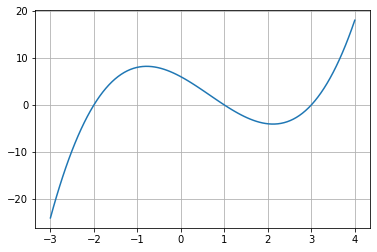

In [75]:
plt.plot(x,f_x)
plt.grid()

### Sección 4: Implementación del algoritmo

Ahora que tenemos las bases, en esta sección podrás implementar el algoritmo descrito en la sección 2. Recuerda que debemos empezar por poder definir el grado de la función y los coeficientes.

Te recomiendo intentar hacer esto por tu cuenta pero si tienes dudas puedes revisar la sección 8 para ideas de como estructurar el código.

In [88]:
def get_xy_arrays(degree, coefficients, x_start, x_end):
    """
    Genera los arreglos de x y f(x) para representar la función.

    Entradas:
     - degree (int): el grado del polinomio, solo puede ser 2, 3 o 4
     - coefficients (list): Una lista con los coeficientes, empezando con
       el coeficiente para la x con mayor exponente
     - x_start (int/float): El inicio del intervalo en x
     - x_end (int/float): El final del intervalo en x
    Salidas:
     - x (np.array): arreglo con los valores del intervalo de x
     - f_x (np.array): arreglo con los valores de f(x)
    """
    # Se genera un array desde el start y el end, con 100 puntos
    x = np.linspace(x_start,x_end,100)

    # Usando ifs, se determina la forma que tendra la ecuacion dependiendo de su grado
    if degree == 4:
        f_x = (coefficients[0]*x**degree + coefficients[1]*x**(degree-1) + coefficients[2]*x**(degree-2) + coefficients[3]*x**(degree-3) + coefficients[4]*x**(degree-4))
    elif degree == 3:
        f_x = (coefficients[0]*x**degree + coefficients[1]*x**(degree-1) + coefficients[2]*x**(degree-2) + coefficients[3]*x**(degree-3))
    elif degree == 2:
        f_x = (coefficients[0]*x**degree + coefficients[1]*x**(degree-1) + coefficients[2]*x**(degree-2))
    else:
      print('Grado invalido')
      
    return x, f_x

In [89]:
def find_cp(x, f_x):
    
    """
    Encuentra los índices de f_x donde se encontraron puntos críticos y los tipos de puntos críticos

    Entrada:
     - x (np.array): arreglo con los valores del intervalo de x.
     - f_x (np.array): arreglo de los valores de f(x) para la función a evaluar.

    Salida:
     - indxs (list/np.array()): Los índices de f_x donde hay puntos críticos.
     - types (list): Lista que define si el punto crítico es un mínimo ('min') o un máximo ('max'). 
       Ej. Para una función con dos puntos críticos, si el primero es un mínimo
       y el segundo un máximo, se debe regresar la lista, ['min','max'].
    """
    # Como necesitamos empezar con una pendiente anterior antes de hacer tu ciclo encuentra
    # la pendiente entre los dos primeros valores
    last_slope = (f_x[1]-f_x[0])/(x[1]-x[0])

    # Crea las listas a regresar
    indxs = []
    types = []

    # Queremos hacer un ciclo para calcular cada pendiente, como ya calculamos la pendiente entre
    # el primer y segundo punto, empezamos con el índice 2.
    for i in range(2,len(f_x)):
        # Calcula la nueva pendiente
        this_slope = (f_x[i]-f_x[i-1])/(x[i]-x[i-1])
        
        #Utilizando las positividades de la pendiente, sabemos que si cambia de signo es un punto critico
        # Por lo que el resultado de la multiplicacion es negativa, es un punto critico
        if (this_slope*last_slope) <= 0:
            indxs.append(i)
            if last_slope < 0:
                types.append('min')
            elif last_slope > 0:
                types.append('max')
        else:
            continue

        last_slope = this_slope
        
    return indxs, types

### Sección 5: Comprobación de Resultados

Corre la siguiente celda para evaluar tus resultados

In [93]:
x, f_x = get_xy_arrays(4,[1,-2,-5,6,0],-3,4)
indxs, types = find_cp(x,f_x)

print(indxs, types)

[25, 51, 76] ['min', 'max', 'min']


Si tu código es correcto, lo que se imprimió en la celda anterior es:

`[32, 73] ['max','min']`

### Sección 6: Gráfico de los resultados

Ahora generamos el gráfico que incluya la función y con plt.scatter() podemos poner los puntos críticos

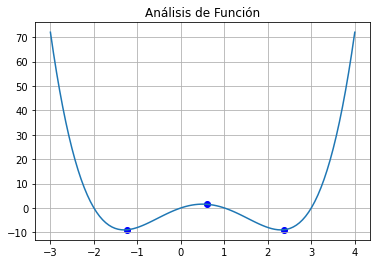

In [94]:
plt.plot(x, f_x)
for indx in indxs:
    plt.scatter(x[indx],f_x[indx],c='b')

_ = plt.grid()
_ = plt.title('Análisis de Función')

### Sección 7: Demuestra más casos

Ya probamos el programa con una función de tercer grado. Ahora tienes que escoger 3 funciones extra (y sus intervalos): una cuadrática, una cúbica y una de cuarto grado. Debes escoger las funciones y los intervalos para que sea claro que tu programa encontró los puntos críticos de manera correcta y debes generar gráficos que muestren el resultado.

# Caso 1


[25, 51, 76] ['min', 'max', 'min']


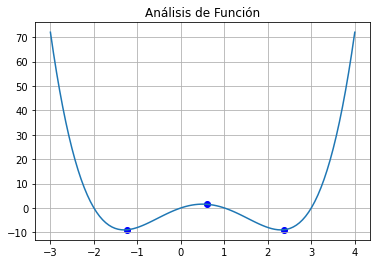

In [95]:
x1, f_x1 = get_xy_arrays(4,[1,-2,-5,6,0],-3,4)
indxs1, types1 = find_cp(x1,f_x1)

print(indxs1, types1)

plt.plot(x1, f_x1)
for indx in indxs1:
    plt.scatter(x1[indx],f_x1[indx],c='b')

_ = plt.grid()
_ = plt.title('Análisis de Función')


### Sección 8: Ayuda

Si necesitas ayuda para crear las funciones `get_xy_arrays()` o `find_cp()` puedes consultar los siguientes fragmentos de código para ayuda.

# Caso 2

[39, 55] ['max', 'min']


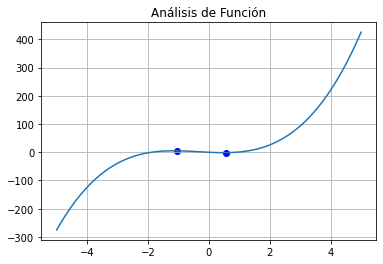

In [97]:
x2, f_x2 = get_xy_arrays(3,[3,3,-5,0],-5,5)
indxs2, types2 = find_cp(x2,f_x2)

print(indxs2, types2)

plt.plot(x2, f_x2)
for indx in indxs2:
    plt.scatter(x2[indx],f_x2[indx],c='b')

_ = plt.grid()
_ = plt.title('Análisis de Función')

# Caso 3

[6] ['min']


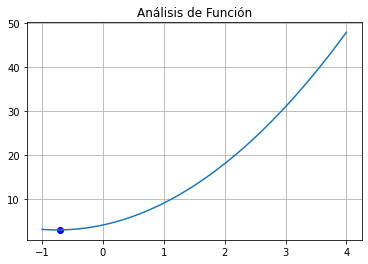

In [100]:
x3, f_x3 = get_xy_arrays(2,[2,3,4],-1,4)
indxs3, types3 = find_cp(x3,f_x3)

print(indxs3, types3)

plt.plot(x3, f_x3)
for indx in indxs3:
    plt.scatter(x3[indx],f_x3[indx],c='b')

_ = plt.grid()
_ = plt.title('Análisis de Función')